In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [20]:
photopeaks=[] #store the photopeak energies as we go along
att=[] #store the attenuation coefficients as we go along

def func(x,a,b,c):
    return a*np.exp(-b*x)+c

plt.rc('text', usetex=True)

[0.0, 1.98, 3.88, 5.81, 7.73, 9.68, 15.9, 22.09, 28.22, 34.37, 40.6]
[16659.0, 13134.0, 10578.0, 8536.0, 6919.0, 5527.0, 2778.0, 1501.0, 704.0, 355.0, 169.0]
mu 0.11151804430760136
Statistical error 0.0012172487716807564
Statistical error 1.0915262899725957
[ 0.    1.98  3.88  5.81  7.73  9.68 15.9  22.09 28.22 34.37 40.6 ]
[16442.35901995 13184.37756331 10666.6439503   8600.82302014
  6942.77551966  5585.58388504  2790.65957302  1398.56521439
   705.24422697   354.46540145   176.1965828 ]
Correlation matrix: 
[[1.         0.59802407 0.23989458]
 [0.59802407 1.         0.74875922]
 [0.23989458 0.74875922 1.        ]]


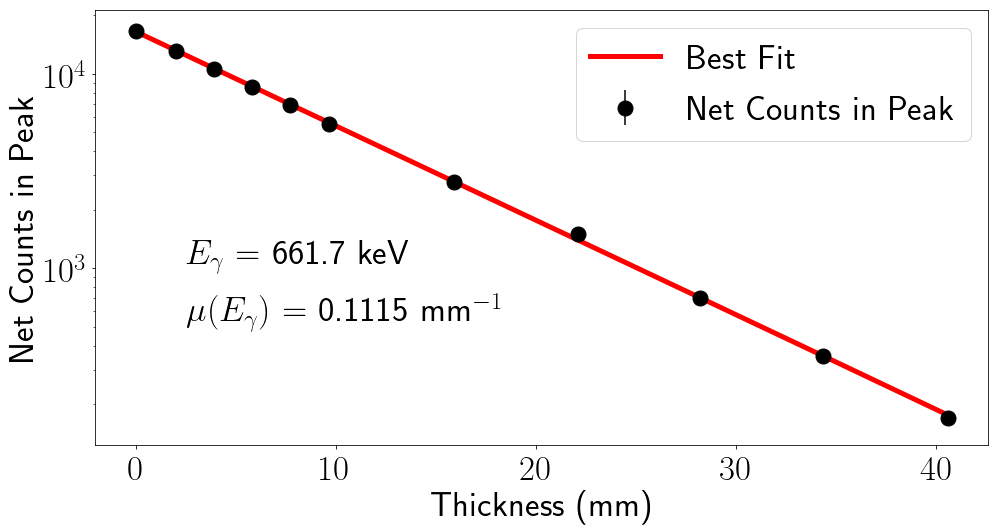

In [63]:
#137Cs with Pb shielding
t=[]
counts=[]
E=[]
f=open('Pb-data.txt','r')
for line in f.readlines()[1:]:
    line = line.strip().split()
    nrg=float(line[0])
    thick=float(line[1])
    ct=float(line[2])
    
    E.append(nrg)
    t.append(thick)
    counts.append(ct)
    
photopeaks.append(E[0])

print(t)
print(counts)

thickness = np.asarray(t)
net = np.asarray(counts)

err = []

for count in net:
    e = np.sqrt(count)
    err.append(e)
    
error = np.asarray(err)

popt, pcov = curve_fit(func, thickness, net, sigma = error, p0=[17000,0.05,300])

print('mu '+str(popt[1]))

print('Statistical error '+str(np.sqrt(pcov[1][1])))

print('Statistical error '+str(100*np.sqrt(pcov[1][1])/popt[1]))

mu_pb = str(round(popt[1],4))

rho_pb = 1.00 #put in the right value once we know it to compare
#with the XCOM value

fig=plt.figure(figsize=(16,8))

plt.errorbar(t,counts,yerr=error,fmt='o',color='k',label="Net Counts in Peak",markersize=15)

plt.plot(thickness,func(thickness,*popt),color='r',lw=5,label='Best Fit')

plt.xlabel("Thickness (mm)",fontsize=35)
plt.ylabel("Net Counts in Peak",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.yscale('log')
plt.legend(loc='best',fontsize=35)

plt.text(2.5,1000, r'$E_{\gamma}$ = 661.7 keV', fontsize = 35)
plt.text(2.5,500, r'$\mu(E_{\gamma})$ = '+mu_pb+" mm$^{-1}$", fontsize = 35)

plt.savefig("137cs-pb.pdf")


print(thickness)
print(func(thickness,*popt))

# Calculating the diagonal^(-1/2) of covariance matrix\n",
diag=np.zeros((3,3))
for i in range(0,3):
    for j in range(0,3):
        if(i != j):
            diag[i][j] = 0
        else:
            diag[i][j] = 1/np.sqrt(pcov[i][j])
            

            
pcorr=np.matmul(diag,np.matmul(pcov,diag))
                                   
                                

print("Correlation matrix: ")
print(pcorr)

In [67]:
t2=[]
counts2=[]

for i in range(len(t)):
    if(i%2 == 0):
        t2.append(t[i])
        counts2.append(counts[i])
        
print(t2)
print(counts2)

[0.0, 3.88, 7.73, 15.9, 28.22, 40.6]
[16659.0, 10578.0, 6919.0, 2778.0, 704.0, 169.0]


In [72]:
thickness2 = np.asarray(t2)
net2 = np.asarray(counts2)

err2 = []

for count in net2:
    e2 = np.sqrt(count2)
    err2.append(e2)
    
error2 = np.asarray(err2)

print(error2)


popt2, pcov2 = curve_fit(func, thickness2, net2, sigma = error2, p0=[17000,0.05,300])

print('mu '+str(popt2[1]))

print('Statistical error '+str(np.sqrt(pcov2[1][1])))

print('Statistical error '+str(100*np.sqrt(pcov2[1][1])/popt2[1]))

mu_pb = str(round(popt2[1],4))

rho_pb = 1.00 #put in the right value once we know it to compare
#with the XCOM value

fig=plt.figure(figsize=(16,8))

plt.errorbar(t2,counts2,yerr=error2,fmt='o',color='k',label="Net Counts in Peak",markersize=15)

plt.plot(thickness2,func(thickness2,*popt),color='r',lw=5,label='Best Fit')

plt.xlabel("Thickness (mm)",fontsize=35)
plt.ylabel("Net Counts in Peak",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.yscale('log')
plt.legend(loc='best',fontsize=35)

plt.text(2.5,1000, r'$E_{\gamma}$ = 661.7 keV', fontsize = 35)
plt.text(2.5,500, r'$\mu(E_{\gamma})$ = '+mu_pb+" mm$^{-1}$", fontsize = 35)

plt.savefig("137cs-pb-2.pdf")

[]


ValueError: `sigma` has incorrect shape.